In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import random

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# !pip install scikit-image

     |████████████████████████████████| 26.5 MB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 9.4 MB/s eta 0:00:01


In [74]:
def show_hog(image, pixels_per_cell=16):
    
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(pixels_per_cell, pixels_per_cell),
                        cells_per_block=(1, 1), visualize=True, multichannel=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()

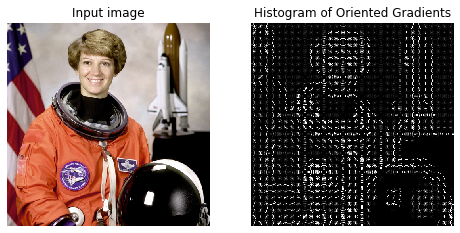

In [22]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = data.astronaut()
show_hog(image)

In [6]:
df = pd.read_csv('/media/walml/beta/decals/results/classifications_2019_12_01.csv')

In [7]:
df.head()

,subject_id,bar_no,bar_strong,bar_weak,bulge-size_dominant,bulge-size_large,bulge-size_moderate,bulge-size_none,bulge-size_small,disk-edge-on_no,...,merging_both-v1_fraction,merging_neither-v1_fraction,merging_major-disturbance_fraction,merging_minor-disturbance_fraction,merging_none_fraction,iauname,retirement_limit,subject_url,upload_date,uploader
0,20925270,7,0,0,0,5,2,0,0,7,...,0.290323,0.419355,0.000000,0.000000,0.000000,J112735.91-020514.9,NaN,https://panoptes-uploads.zooniverse.org/produc...,2018-04-19,NaN
1,27363232,9,0,1,0,5,3,0,2,10,...,0.000000,0.000000,0.055556,0.138889,0.333333,J095946.34+040001.3,NaN,https://panoptes-uploads.zooniverse.org/produc...,2018-11-07,NaN
2,35622993,1,10,10,0,3,13,0,5,21,...,0.000000,0.000000,0.000000,0.153846,0.730769,J012159.00-023544.0,40.0,https://panoptes-uploads.zooniverse.org/produc...,2019-08-04,panoptes_oracle
3,36239648,3,14,7,0,0,10,2,12,24,...,0.000000,0.000000,0.076923,0.076923,0.846154,J152621.71+131656.7,40.0,https://panoptes-uploads.zooniverse.org/produc...,2019-08-23,panoptes_oracle
4,21663050,3,0,3,0,1,2,1,2,6,...,0.000000,0.263158,0.052632,0.026316,0.657895,J011510.87-000659.8,NaN,https://panoptes-uploads.zooniverse.org/produc...,2018-05-16,NaN


In [8]:
df.columns.values

array(['subject_id', 'bar_no', 'bar_strong', 'bar_weak',
       'bulge-size_dominant', 'bulge-size_large', 'bulge-size_moderate',
       'bulge-size_none', 'bulge-size_small', 'disk-edge-on_no',
       'disk-edge-on_yes', 'edge-on-bulge_boxy', 'edge-on-bulge_none',
       'edge-on-bulge_rounded', 'has-spiral-arms_no',
       'has-spiral-arms_yes', 'how-rounded_cigar-shaped',
       'how-rounded_in-between', 'how-rounded_round', 'merging_both-v1',
       'merging_major-disturbance', 'merging_merger',
       'merging_minor-disturbance', 'merging_neither-v1', 'merging_none',
       'merging_tidal-debris-v1', 'smooth-or-featured_artifact',
       'smooth-or-featured_featured-or-disk', 'smooth-or-featured_smooth',
       'spiral-arm-count_1', 'spiral-arm-count_2', 'spiral-arm-count_3',
       'spiral-arm-count_4', 'spiral-arm-count_cant-tell',
       'spiral-arm-count_more-than-4', 'spiral-winding_loose',
       'spiral-winding_medium', 'spiral-winding_tight',
       'smooth-or-featured_tot

In [12]:
df = pd.read_csv('/media/walml/beta/decals/temp_workdir/classifications/classifications_2019_12_24.csv')

In [13]:
df.columns.values

array(['subject_id', 'bar_no', 'bar_strong', 'bar_weak',
       'bulge-size_dominant', 'bulge-size_large', 'bulge-size_moderate',
       'bulge-size_none', 'bulge-size_small', 'disk-edge-on_no',
       'disk-edge-on_yes', 'edge-on-bulge_boxy', 'edge-on-bulge_none',
       'edge-on-bulge_rounded', 'has-spiral-arms_no',
       'has-spiral-arms_yes', 'how-rounded_cigar-shaped',
       'how-rounded_in-between', 'how-rounded_round', 'merging_both-v1',
       'merging_major-disturbance', 'merging_merger',
       'merging_minor-disturbance', 'merging_neither-v1', 'merging_none',
       'merging_tidal-debris-v1', 'smooth-or-featured_artifact',
       'smooth-or-featured_featured-or-disk', 'smooth-or-featured_smooth',
       'spiral-arm-count_1', 'spiral-arm-count_2', 'spiral-arm-count_3',
       'spiral-arm-count_4', 'spiral-arm-count_cant-tell',
       'spiral-arm-count_more-than-4', 'spiral-winding_loose',
       'spiral-winding_medium', 'spiral-winding_tight',
       'smooth-or-featured_tot

In [14]:
df['subject_id']

0         20925270
1         27363232
2         35622993
3         36239648
4         21663050
            ...   
136796    38622959
136797    37898608
136798    38617074
136799    38600880
136800    36210498
Name: subject_id, Length: 136801, dtype: int64

In [15]:
df['iauname']

0         J112735.91-020514.9
1         J095946.34+040001.3
2         J012159.00-023544.0
3         J152621.71+131656.7
4         J011510.87-000659.8
                 ...         
136796    J104144.51+244847.0
136797    J100700.61+140731.1
136798    J103126.06+110240.4
136799    J102602.88+212517.9
136800                    NaN
Name: iauname, Length: 136801, dtype: object

In [18]:
def get_loc(iauname):
    return f'/media/walml/beta/decals/png_native/dr5/{iauname[:4]}/{iauname}.png'

In [23]:
path = get_loc(df['iauname'][0])
os.path.isfile(path)

True

In [30]:
from skimage import io
from skimage.transform import rescale

In [35]:
from PIL import Image

In [61]:
def preprocess_png(path):
    image = Image.open(path)
    width = 100
    left = width
    right = image.size[0] - width
    image = image.crop([width, width, image.size[0]-width, image.size[0] - width])
    return image

In [77]:
def calculate_hog(image, pixels_per_cell=24):
    fd, _ = hog(image, orientations=8, pixels_per_cell=([pixels_per_cell, pixels_per_cell]),
                        cells_per_block=(1, 1), visualize=True, multichannel=True)
    return fd

In [78]:
image = preprocess_png(path)
features = calculate_hog(image)

In [79]:
features.shape

(648,)

(array([ 15.,   2.,   4.,   6.,   6.,   8., 567.,  20.,  11.,   9.]),
 array([0.        , 0.0554166 , 0.1108332 , 0.16624979, 0.22166639,
        0.27708299, 0.33249959, 0.38791618, 0.44333278, 0.49874938,
        0.55416598]),
 <a list of 10 Patch objects>)

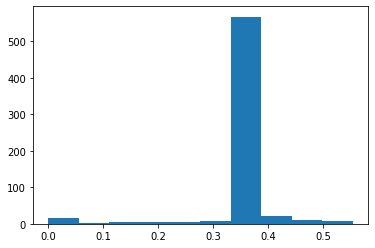

In [80]:
plt.hist(features)

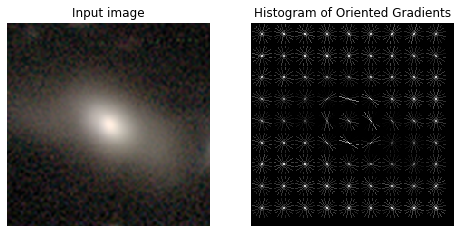

In [81]:
show_hog(image, pixels_per_cell=24)

In [83]:
power = pd.read_csv('../power.csv')

In [86]:
galaxies = power['comment_focus_id'].unique().astype(int)

In [87]:
galaxies

array([16215478, 16215369, 16215566, ..., 32407797, 41822007, 41826577])

In [90]:
feature_df = pd.DataFrame({'subject_id':galaxies})

In [92]:
catalog = pd.merge(feature_df, df, how='inner')

In [95]:
catalog.to_csv('votes.csv', index=False)

In [ ]:
# and calculate HOG later...